# scikit learn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split #train data, test data 나누기
from sklearn.metrics import mean_squared_error # 평균제곱오차

In [2]:
a = [163,179,166,169,171]
type(a)

list

In [3]:
a1 = np.array(a) #배열로 만들기
a1

array([163, 179, 166, 169, 171])

In [4]:
np.array(a).reshape(-1,1) #2차원

array([[163],
       [179],
       [166],
       [169],
       [171]])

In [5]:
a1.reshape(-1,1) # -1 : 알아서 결정해라.

array([[163],
       [179],
       [166],
       [169],
       [171]])

In [6]:
a1[:,np.newaxis] # newaxis, reshape 두가지 방법사용

array([[163],
       [179],
       [166],
       [169],
       [171]])

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression() # 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
a = [163,179,166,169,171]
y= [54,63,57,56,58]
X = np.array(a).reshape(-1,1) # 학습데이터는 2차원 배열로 만들고 시작

#밑의 4줄로 선형회귀 직선모델 데이터 구할 수 있음
regr.fit(X,y) #선형회귀 모델에 입력
coef = regr.coef_ #기울기
intercept = regr.intercept_ #절편
score = regr.score(X,y) #얼마나 잘 따르는가 평기(점수)

print("y = {}*X + {:.2f}".format(coef.round(2),intercept)) #format사용 => {}필요
print("데이터와 선형회귀 직선의 관계점수 = {:.1%}".format(score)) 

y = [0.53]*X + -32.50
데이터와 선형회귀 직선의 관계점수 = 91.9%


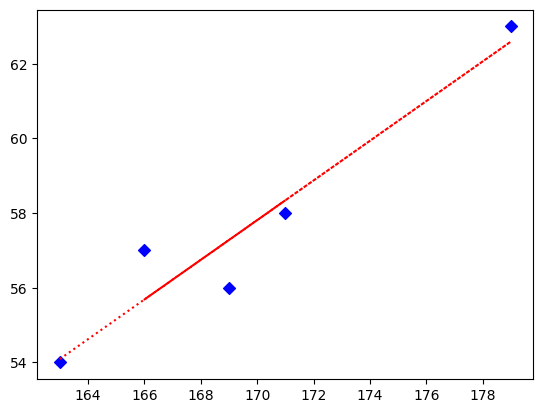

In [ ]:
plt.scatter(X,y,color='blue',marker='D') #산포도그림
y_pred = regr.predict(X) #예측값계산
plt.plot(X,y_pred,'r:') 

In [ ]:
y_pred1 = regr.predict([[175]]) #값 직접 넣어서 예측값계산(추정값)
y_pred1.round(2)

array([60.47])

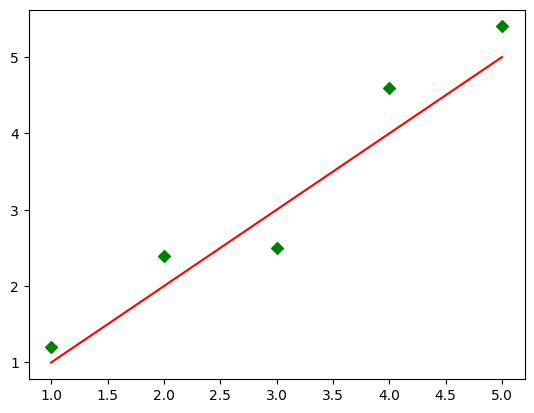

In [ ]:
x = np.array([1,2,3,4,5])
y= np.array([1.2,2.4,2.5,4.6,5.4])
plt.scatter(x,y,color='green',marker='D')
plt.plot(x,1.0*x,'r') # 0.9보다 더 정확하게 설명하는 직선

# 평균제곱오차 (MSE)
* 오차평가 시 => 평균제곱곱오차(MSE)사용
* 기울기가 0일때 오차가 최소임.

In [ ]:
y = np.array([1.2 , 2.4, 2.5, 4.6, 5.4])
y_hat = np.array([1,2,3,4,5])
diff = (y_hat - y)**2    # 두개의 차이값의 제곱
e_mse = diff.sum() / len(y) 
print("MSE=",e_mse.round(3))

MSE= 0.194


In [ ]:
from sklearn.metrics import mean_squared_error
# 오차 합 곡면의 기울기를 따라 내려가 최소 오차에 접근
print("MSE=",mean_squared_error(y_hat,y).round(3)) #함수사용해 더 쉽게 구함

MSE= 0.194


# 경사하강법

In [ ]:
#for문사용

x = np.array([1,2,3,4,5])
y= np.array([1.2,2.4,2.5,4.6,5.4])
w,b = 0,0 #초기값

#학습률,학습횟수 1000번 반복(학습률 너무 작으면 정답에 수렴못함, 학습횟수 많으면 많은 시간걸림)
learning_rate, epoch = 0.005, 1000  
n = len(x) #입력데이터 개수

for i  in range(epoch): #학습루프
  y_pred = w*x +b
  error = y_pred-y #성능척도
  w= w-learning_rate * (error *x).sum()
  b = b-learning_rate * error.sum()

print('w = ',w.round(2), 'b = ',b.round(2))

w =  1.06 b =  0.04


In [ ]:
#LinearRegression 사용
import numpy as np
from sklearn import linear_model

x = np.array([1,2,3,4,5])
y= np.array([1.2,2.4,2.5,4.6,5.4])
regr = linear_model.LinearRegression() #절편값 b는 0으로 둔다
x = x[:,np.newaxis]
regr.fit(x,y) #학습

print('w = ',regr.coef_.round(2), 'b = ',regr.intercept_.round(2))

w =  [1.06] b =  0.04


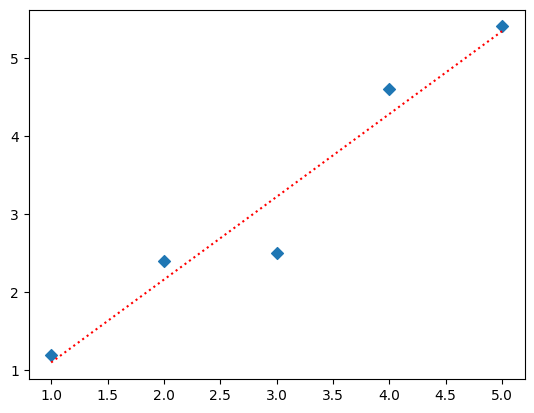

In [ ]:
x = np.array([1,2,3,4,5])
y= np.array([1.2,2.4,2.5,4.6,5.4])
plt.scatter(x,y,marker='D')

y_pred = 1.06 * x +0.04 #구한 w,b를 가지고 선형회귀직선 그림
plt.plot(x,y_pred,'r:')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #train data, test data 나누기
from sklearn.metrics import mean_squared_error # 평균제곱오차

In [ ]:
#캐글데이터 가져오기(Pandas)
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
weight_height = pd.read_csv(url)
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


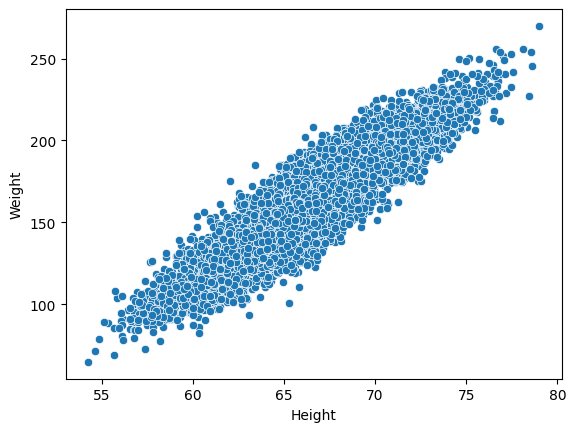

In [ ]:
x = weight_height['Height']
y = weight_height['Weight']

sns.scatterplot(x=x, y=y)
plt.show()

In [ ]:
y_hat = weight_height['Height']
diff = (y_hat - y)**2    # 두개의 차이값의 제곱
e_mse = diff.sum() / len(y) 
print("MSE=",e_mse.round(3))

MSE= 9856.025


In [ ]:
from sklearn.linear_model import LinearRegression

x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) #80%트레이닝, 20%테스트
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
# y_pred = lr.predict(x_test.values.reshape(-1,1),y_test) 
# #predict는 test를 가지고 함

In [ ]:
# MSE =mean_squared_error(y_test,y_pred) #차이를 제곱
# RMSE = np.sqrt(MSE) #mse 오차 보정

# 다중회귀

* 기대수명과 상관도도

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #train data, test data 나누기
from sklearn.metrics import mean_squared_error # 평균제곱오차

path = "https://raw.githubusercontent.com/dongupak/DataML/main/csv/"
file = path+ "life_expectancy.csv"
life = pd.read_csv(file)
life.head(3)
print(life.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


<ipython-input-10-9ab8985ce246>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = life.corr().round(2)


<Axes: >

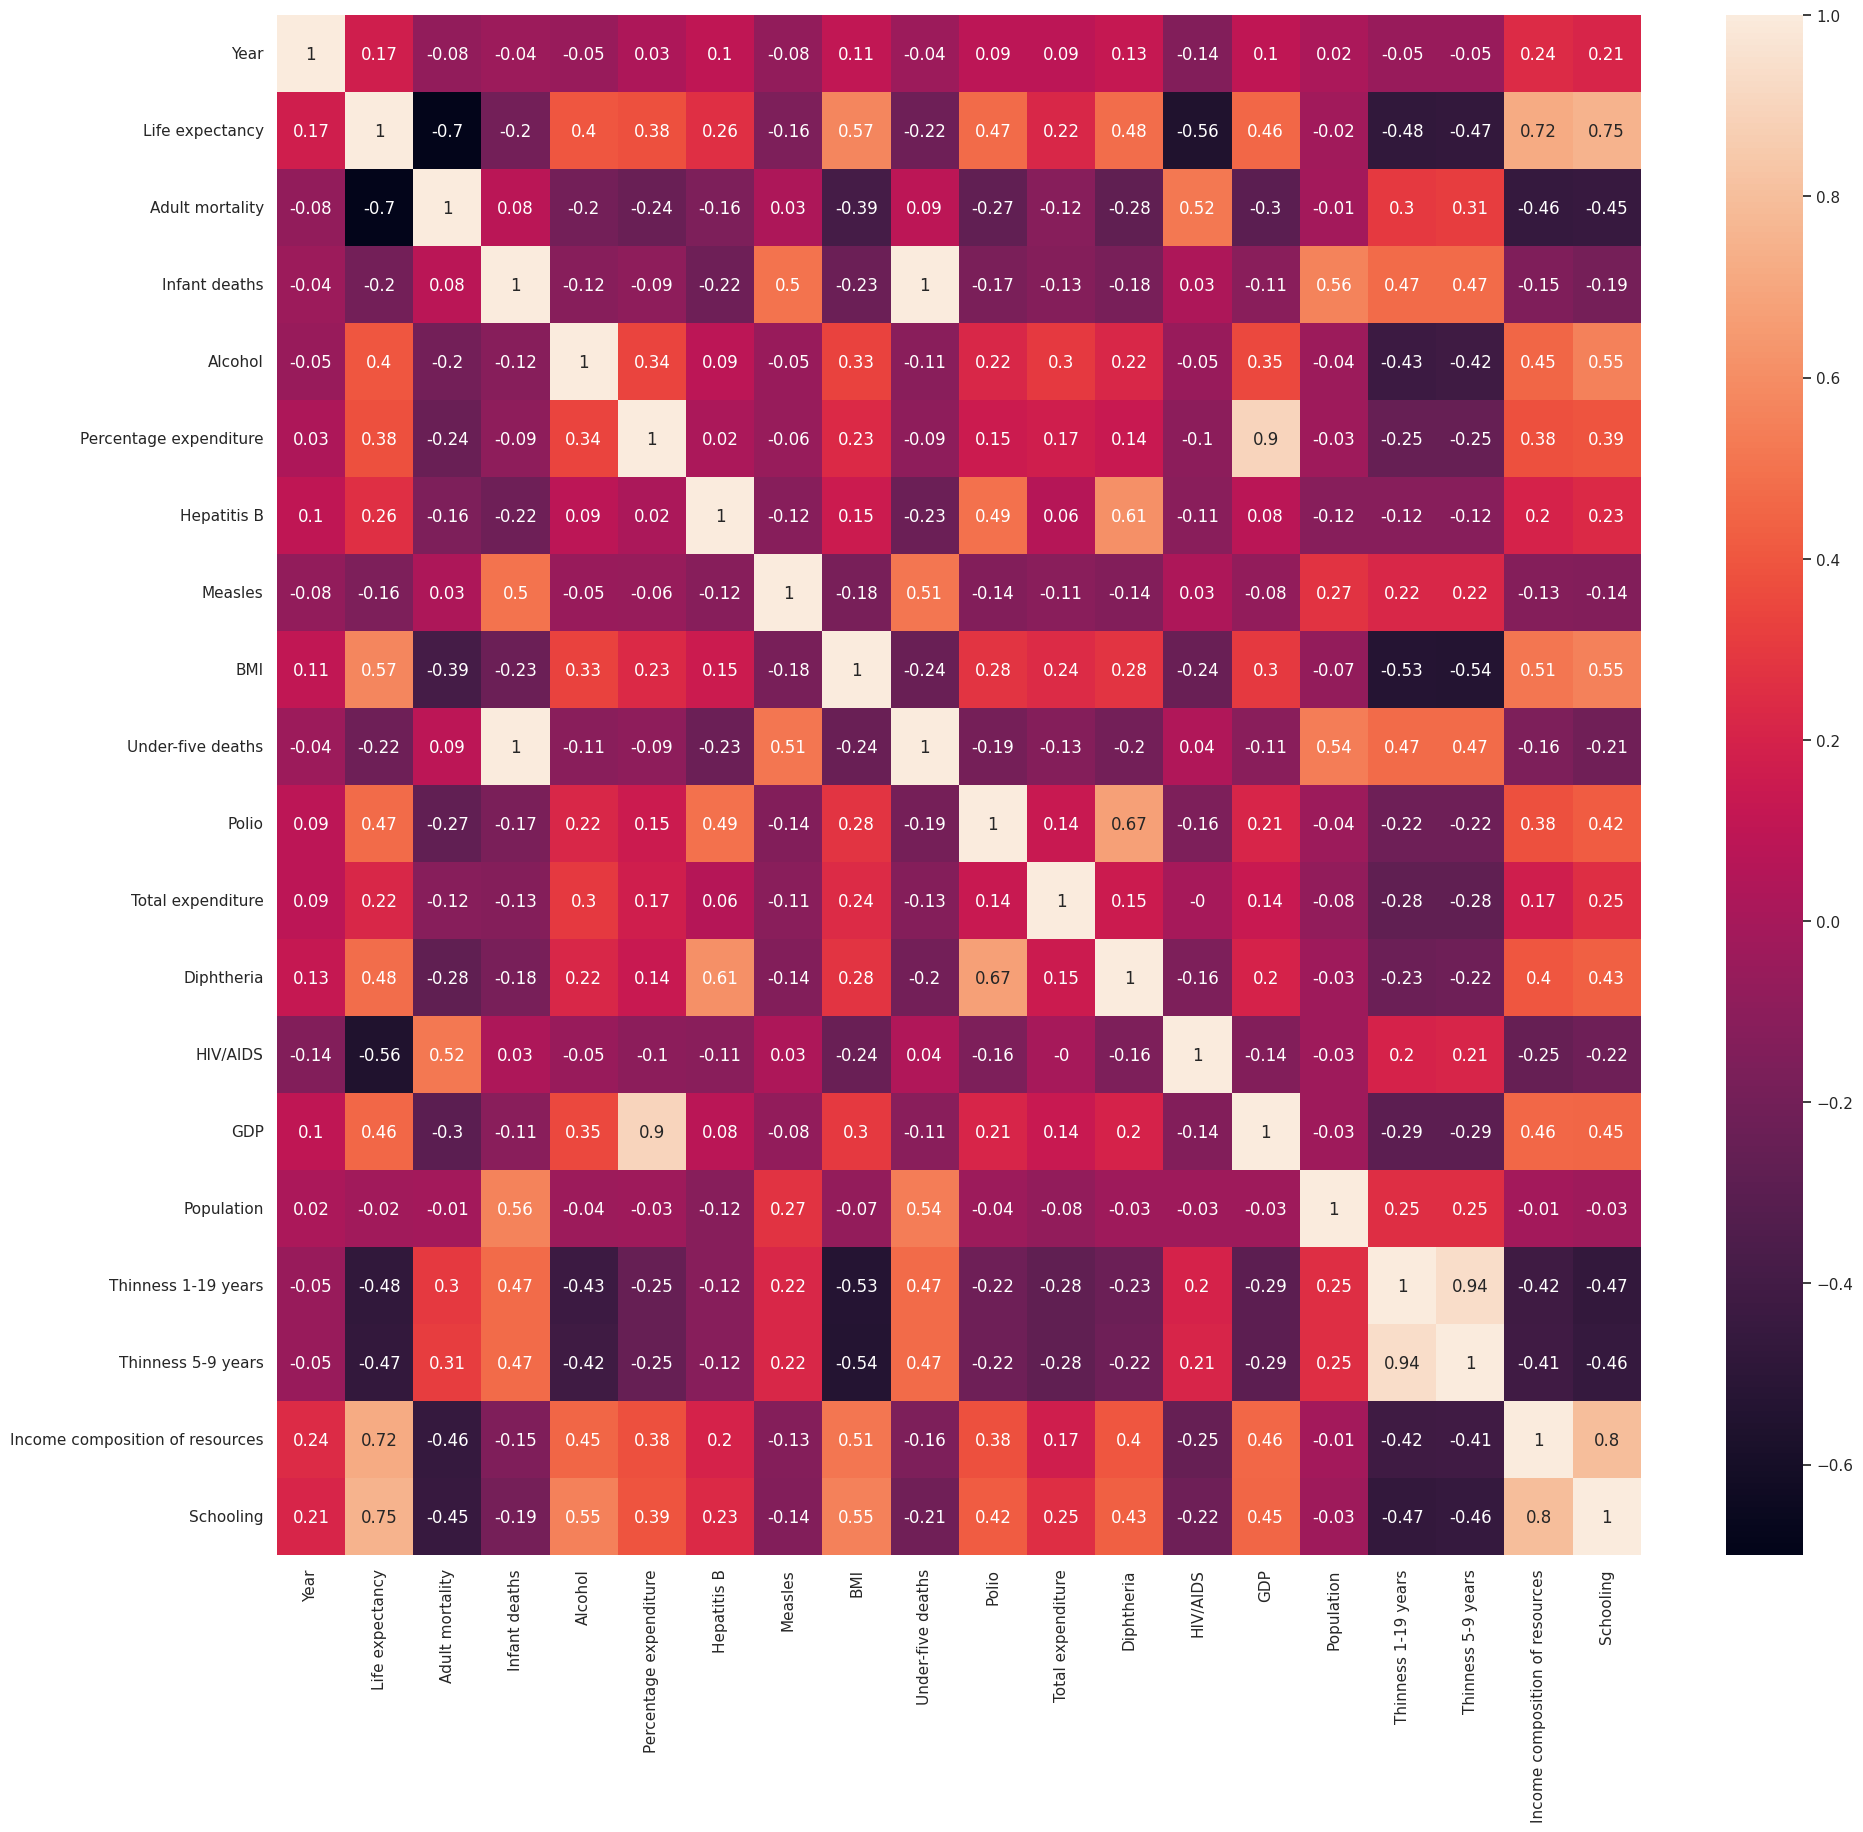

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(22,20)})
correlation_matrix = life.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

In [11]:
print("기대수명과 상관계수")
print(life.corr().round(3)['Life expectancy'])

기대수명과 상관계수
Year                               0.170
Life expectancy                    1.000
Adult mortality                   -0.696
Infant deaths                     -0.197
Alcohol                            0.405
Percentage expenditure             0.382
Hepatitis B                        0.257
Measles                           -0.158
BMI                                0.568
Under-five deaths                 -0.223
Polio                              0.466
Total expenditure                  0.218
Diphtheria                         0.479
HIV/AIDS                          -0.557
GDP                                0.461
Population                        -0.022
Thinness 1-19 years               -0.477
Thinness 5-9 years                -0.472
Income composition of resources    0.725
Schooling                          0.752
Name: Life expectancy, dtype: float64


<ipython-input-11-0c6b4ade6f47>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(life.corr().round(3)['Life expectancy'])


In [12]:
c= life.corr().round(2)['Life expectancy'] #기대수명과 다른 특성들과의 상관계수 값
c = np.abs(c) #절댓값
print(c.sort_values(ascending=False)[1:8]) # 상위 7개값

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Thinness 1-19 years                0.48
Diphtheria                         0.48
Name: Life expectancy, dtype: float64


<ipython-input-12-79b77021c3f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= life.corr().round(2)['Life expectancy'] #기대수명과 다른 특성들과의 상관계수 값


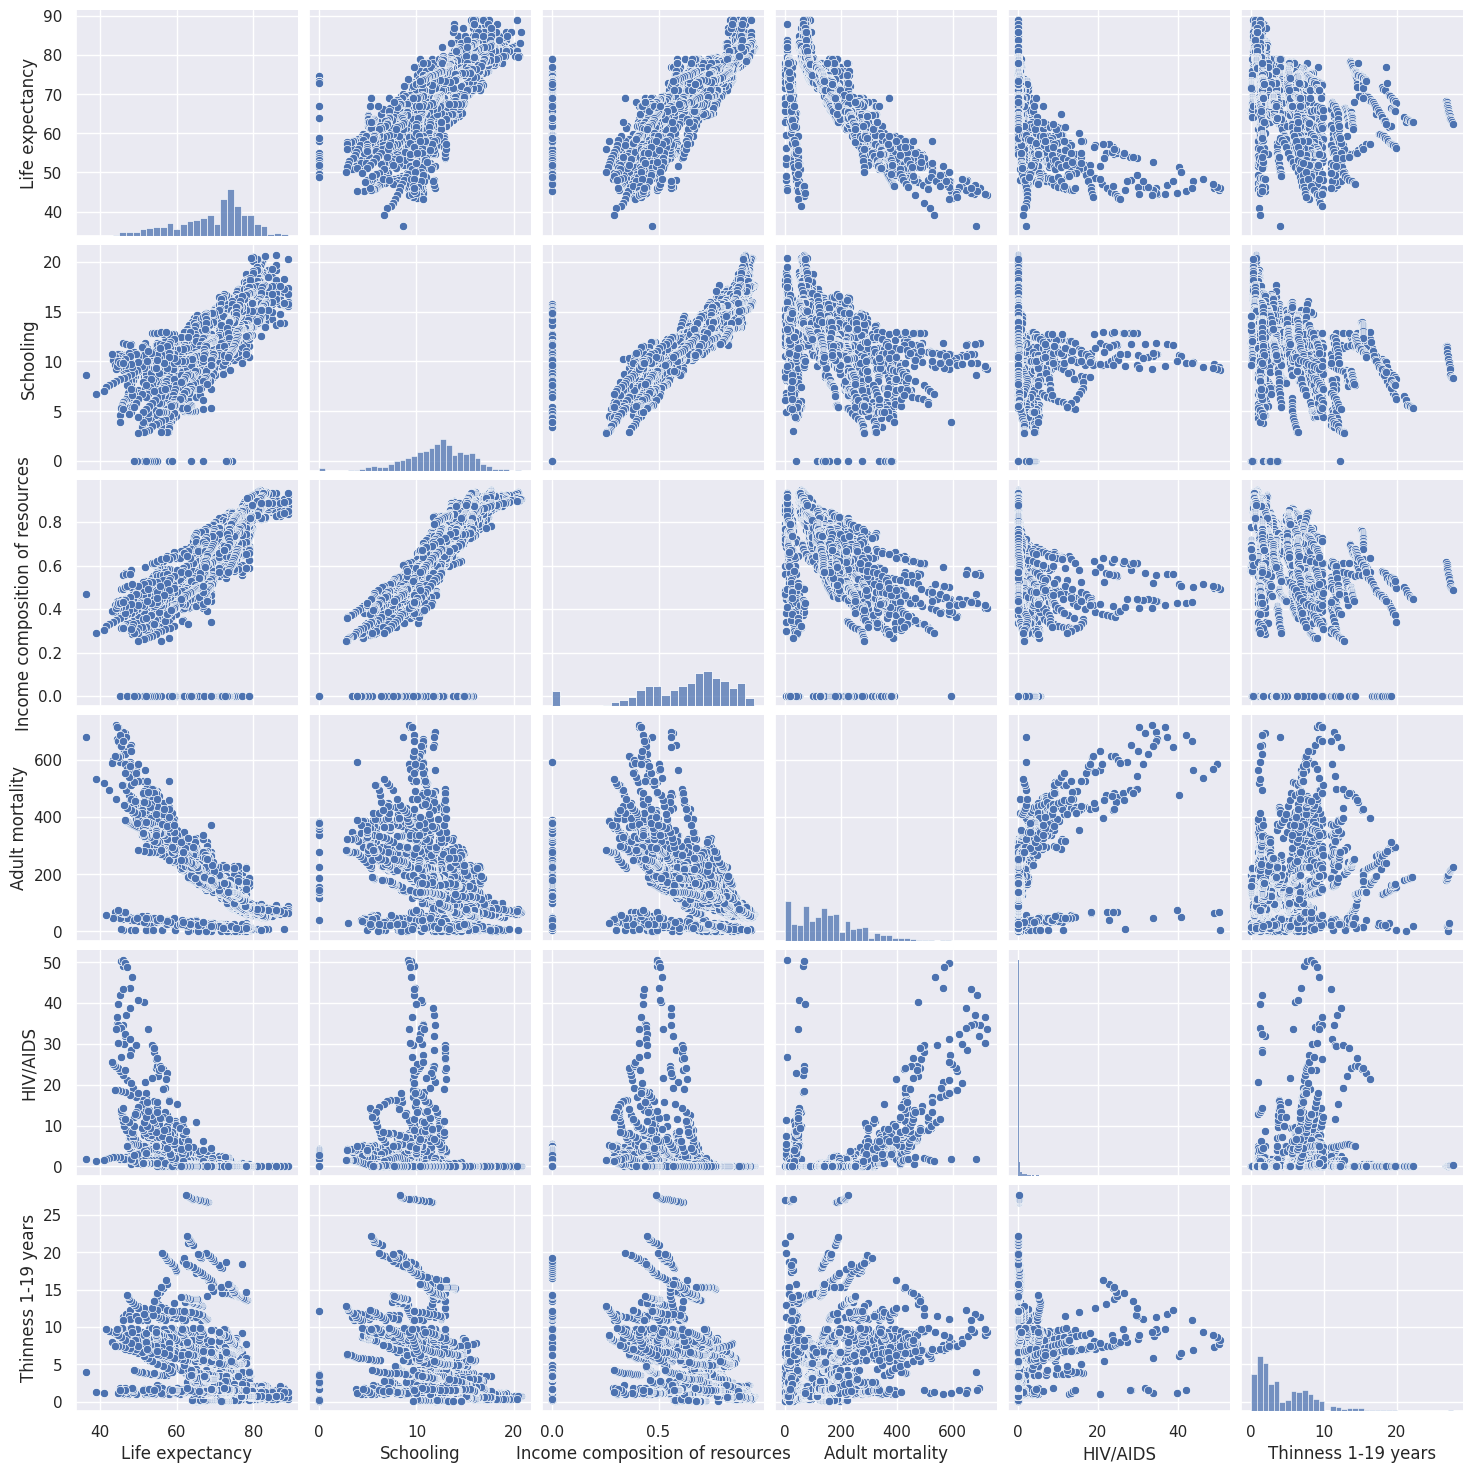

In [ ]:
sns.pairplot(life[['Life expectancy','Schooling',\
                   'Income composition of resources',\
                   'Adult mortality','HIV/AIDS','Thinness 1-19 years']])
plt.show()

In [ ]:
#전처리 과정(결측데이터 찾)
life[['Life expectancy','Schooling',\
                   'Income composition of resources',\
                   'Adult mortality','HIV/AIDS','Thinness 1-19 years']].isna().sum()

Life expectancy                     10
Schooling                          163
Income composition of resources    167
Adult mortality                     10
HIV/AIDS                             0
Thinness 1-19 years                 34
dtype: int64

In [13]:
life.dropna(inplace=True) # 결측데이터 없는 데이터만으로 선형회귀모델 만듦

x = life[['Schooling','Income composition of resources','Adult mortality','HIV/AIDS','Thinness 1-19 years']]
y = life[['Life expectancy']] #정답값
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) #훈련,테스트 위해 별도 데이터집합 만듦

regr = LinearRegression()
regr.fit(x_train,y_train)
print("선형회귀 모델점수 = ",regr.score(x_test,y_test).round(3))

선형회귀 모델점수 =  0.801


# 데이터분포 직선 아닐때(다항회귀모델사용)

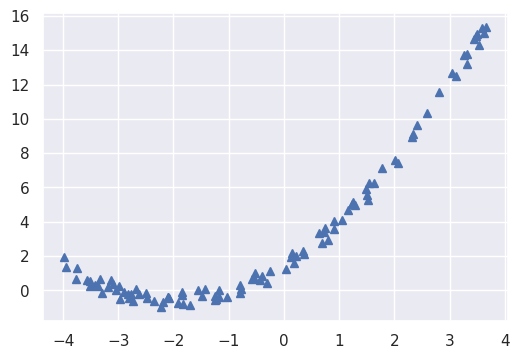

In [15]:
m = 100 #데이터 개수
X = 8*np.random.rand(m,1) -4  #평균 0/ -4에서 4사이 분포
y = 0.5 *X **2 +2 *X +1 +np.random.rand(m,1)

plt.figure(figsize=(6,4))
plt.plot(X,y,'b^')

model 점수= 0.769
계수 절편 = [[1.87940144]] [4.13865394]


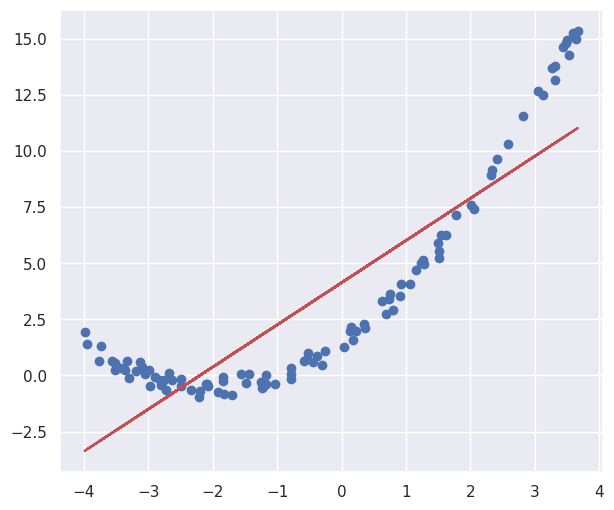

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regr = LinearRegression()
regr.fit(X,y)
print("model 점수=",regr.score(X,y).round(3))
print("계수 절편 =", regr.coef_, regr.intercept_)

plt.figure(figsize=(7,6))
y_predict = regr.predict(X)
plt.scatter(X,y)
plt.plot(X.flatten(), y_predict, color='r')
#2차방정식 모양을 1차방정식 형태로 해석하니 오차 발생

* 도전문제 (3차방정식)

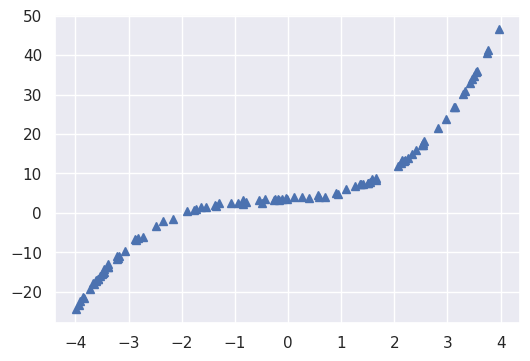

In [18]:
m = 100 #데이터 개수
X = 8*np.random.rand(m,1) -4  #평균 0/ -4에서 4사이 분포
y = 0.5* X **3 + 0.5 *X **2 + 1*X +3 +np.random.rand(m,1) #난수생성
plt.figure(figsize=(6,4))
plt.plot(X, y, 'b^')

#다항회귀모델사용(preprocessing)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(2).reshape(-1,1)
print(x)

[[0]
 [1]]


In [23]:
poly = PolynomialFeatures() #디폴트 degree=2(2차항생성)
x = poly.fit_transform(x)
print(x)
#print(poly.get_feature_names()) #특성이름 알아보는 메소드

[[1. 0. 0.]
 [1. 1. 1.]]


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

m = 100 #데이터 개수
X = 8*np.random.rand(m,1) -4  #-4에서 4사이 분포
y = 0.5 *X **2 +2 *X +1 +np.random.rand(m,1)

poly_features = PolynomialFeatures(degree = 2,\
                                   include_bias = False) # 편향값 생성하지 않음
x_poly=poly_features.fit_transform(X)

In [27]:
regr = LinearRegression()
regr.fit(x_poly, y)
print("다항 회귀 모델점수=", regr.score(x_poly,y).round(3))
print("다항 회귀 계수=", regr.coef_, '절편=', regr.intercept_)
#0.5 *x **2 + 2*x + 1

다항 회귀 모델점수= 0.996
다항 회귀 계수= [[1.98724181 0.50183242]] 절편= [1.47408464]


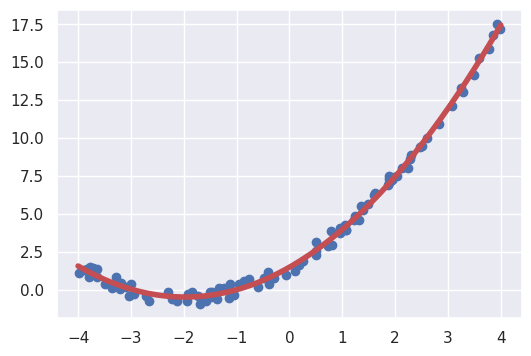

In [28]:
domain = np.linspace(-4,4,50).reshape(-1,1)#입력값
domain_2 = poly_features.fit_transform(domain) #다항 특성 추가
plt.figure(figsize=(6,4))
y_predict = regr.predict(domain_2) #예측값
plt.scatter(X,y) #데이
plt.plot(domain, y_predict, color='r', linewidth=4) #예측모델

#과대적합에 주의
- 항이 많아지고 차수가 커질때

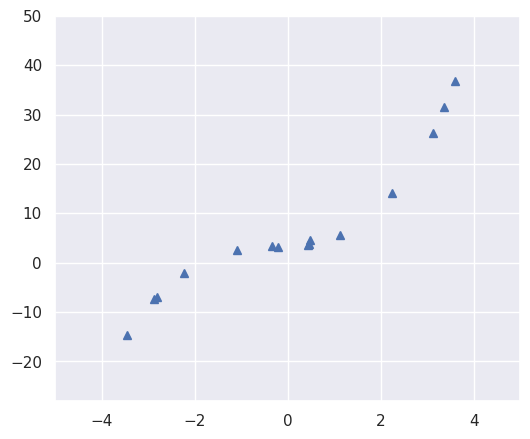

In [29]:
m = 20 #데이터 개수
X = 8*np.random.rand(m,1) -4
y = 0.5*X **3 + 0.5 *X **2 +X +3 +np.random.rand(m,1)

x_train, x_test, y_train, y_test = train_test_split(X,y) 
#훈련,테스츠 위해 별도 데이터집합 만듦

plt.figure(figsize=(6,5))
plt.xlim(-5,5); plt.ylim(-28,50)
plt.plot(x_train, y_train, 'b^') #학습용 데이터그리가

In [31]:
#다항회귀모델 점수, 계수, 절편
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#다항특성 20개
poly_features = PolynomialFeatures(degree = 20,\
                                   include_bias = False)
x_poly=poly_features.fit_transform(x_train)
regr = LinearRegression()
regr.fit(x_poly, y_train)
print("다항 회귀 모델점수=", regr.score(x_poly,y_train).round(3))
#1.0-> 학습용데이터 다 지나는 함수 만들어
print("다항 회귀 계수=", regr.coef_, '\n절편=', regr.intercept_)

다항 회귀 모델점수= 1.0
다항 회귀 계수= [[ 9.85039083e+01 -3.00944915e+02 -8.38698819e+02  1.12955413e+03
   9.09073463e+02  6.49473749e+02  3.54985356e+02 -1.53413685e+02
  -1.99635773e+02 -5.83951137e+02 -3.01211611e+02 -4.72187368e+02
   8.31844444e+01  3.20882088e+02  1.35160119e+00 -6.14463534e+01
  -1.42803565e+00  4.84617861e+00  7.68365455e-02 -1.37665901e-01]] 
절편= [27.47294923]


In [32]:
x_poly=poly_features.fit_transform(x_test)
print("test data 모델점수=", regr.score(x_poly,y_test)) #나쁜결과(과대적)

test data 모델점수= -243501126150.03888


#최적화와 릿지회귀